# **MACHINE LEARNINGFOR TEXT MINING**


### **Traditional Programming vs. Machine Learning**

**Traditional Programming:**
- In traditional programming, explicit rules and instructions are written by developers to dictate how a computer should handle various scenarios. Each possible situation is accounted for by the programmer, and the system follows these predefined instructions.

**Machine Learning:**
- Machine learning (ML) differs in that it allows computers to learn from data rather than relying solely on explicit instructions. ML algorithms can analyze large datasets, identify patterns, and make predictions or decisions based on the data. As the system is exposed to more data, it can improve its performance over time without requiring specific reprogramming.

### **Types of Text That Can Be Analyzed**
- **Tweets**
- **Facebook Posts**
- **Comments**
- **Blogs**
- **Product/Customer Reviews**
- **News Articles**
- **Media Reports**

### **Text Analysis Process**

1. **Data Collection:**
   - **Crawling:** Using web crawlers or robots to gather data from various sources.
   - **APIs:** Accessing data through application programming interfaces provided by platforms.

2. **Text Preprocessing:**
   - **Tokenization:** Breaking text into individual words or tokens.
   - **Stemming:** Reducing words to their base or root form.
   - **Lemmatization:** Converting words to their base or dictionary form while considering context.
   - **Stop Words Removal:** Filtering out common words that do not contribute to the meaning (e.g., "the," "is").

3. **Transformation:**
   - **Feature Extraction:** Identifying and extracting relevant features from the text.
   - **Embedding:** Representing words or phrases in a numerical format that captures semantic meaning (e.g., word embeddings).

4. **Data Mining and Analysis:**
   - **Knowledge Extraction:** Identifying patterns and insights from the text data.
   - **Machine Learning:** Applying algorithms to learn from the data and make predictions or classifications.

5. **Evaluation and Interpretation:**
   - **Interpretation:** Understanding the results and insights derived from the analysis.
   - **Result Analysis:** Assessing the effectiveness and accuracy of the text analysis process and refining the approach as needed.

This process encompasses the journey from gathering raw text data to extracting meaningful insights and improving decision-making using advanced analytical techniques.

In [ ]:
import pandas as pd

## **STEP1 – COLLECTINGDATA**

In [ ]:
data = pd.read_csv("/content/sample_data/Movie_Review.csv")

data.head()

,review,sentiment
0,I went and saw this movie last night after bei...,1
1,Actor turned director Bill Paxton follows up h...,1
2,As a recreational golfer with some knowledge o...,1
3,"I saw this film in a sneak preview, and it is ...",1
4,Bill Paxton has taken the true story of the 19...,1


## **STEP2 – EXPLORINGAND PREPARING THE DATA**


In data analysis, checking for null values is crucial to ensure data quality and integrity. The method data.isnull().sum() is used to identify and count missing values within a DataFrame.

In [ ]:
# checking for null values
data.isnull().sum()

,0
review,0
sentiment,0


In [ ]:
# checking for number of sentiment in sentiment column
data.sentiment.value_counts()

,count
sentiment,
1,25000
0,25000


In [ ]:
# checking if there are same review multiple time
data.review.value_counts().head(2)

,count
review,
"Loved today's show!!! It was a variety and not solely cooking (which would have been great too). Very stimulating and captivating, always keeping the viewer peeking around the corner to see what was coming up next. She is as down to earth and as personable as you get, like one of us which made the show all the more enjoyable. Special guests, who are friends as well made for a nice surprise too. Loved the 'first' theme and that the audience was invited to play along too. I must admit I was shocked to see her come in under her time limits on a few things, but she did it and by golly I'll be writing those recipes down. Saving time in the kitchen means more time with family. Those who haven't tuned in yet, find out what channel and the time, I assure you that you won't be disappointed.",5
"Hilarious, clean, light-hearted, and quote-worthy. What else can you ask for in a film? This is my all-time, number one favorite movie. Ever since I was a little girl, I've dreamed of owning a blue van with flames and an observation bubble.<br /><br />The cliché characters in ridiculous situations are what make this film such great fun. The wonderful comedic chemistry between Stephen Furst (Harold) and Andy Tennant (Melio) make up most of my favorite parts of the movie. And who didn't love the hopeless awkwardness of Flynch? Don't forget the airport antics of Leon's cronies, dressed up as Hari Krishnas: dancing, chanting and playing the tambourine--unbeatable! The clues are genius, the locations are classic, and the plot is timeless.<br /><br />A word to the wise, if you didn't watch this film when you were little, it probably won't win a place in your heart today. But nevertheless give it a chance, you may find that ""It doesn't matter what you say, it doesn't matter what you do, you've gotta play.""",4


In [ ]:
# droping duplicate values from data
data.drop_duplicates(inplace=True)

In [ ]:
# checking the first line of review
data.review[0]

"I went and saw this movie last night after being coaxed to by a few friends of mine. I'll admit that I was reluctant to see it because from what I knew of Ashton Kutcher he was only able to do comedy. I was wrong. Kutcher played the character of Jake Fischer very well, and Kevin Costner played Ben Randall with such professionalism. The sign of a good movie is that it can toy with our emotions. This one did exactly that. The entire theater (which was sold out) was overcome by laughter during the first half of the movie, and were moved to tears during the second half. While exiting the theater I not only saw many women in tears, but many full grown men as well, trying desperately not to let anyone see them crying. This movie was great, and I suggest that you go see it before you judge."

Here's a breakdown of each step in the `clean_review` function for cleaning text:

1. **Importing Libraries:**
   ```python
   import nltk
   nltk.download('stopwords')
   from nltk.tokenize import word_tokenize
   from nltk.corpus import stopwords
   from nltk.stem.porter import PorterStemmer
   from bs4 import BeautifulSoup
   ```
   - **nltk:** The Natural Language Toolkit for various text processing tasks.
   - **BeautifulSoup:** A library for parsing HTML and XML documents.

2. **Function Definition:**
   ```python
   def clean_review(review, stemmer = PorterStemmer(), stop_words = set(stopwords.words("english"))):
   ```
   - **Function Name:** `clean_review`.
   - **Parameters:**
     - `review`: The text that needs to be cleaned.
     - `stemmer`: An instance of the PorterStemmer for stemming words (default is `PorterStemmer()`).
     - `stop_words`: A set of common English stopwords to be excluded (default is the English stopwords from NLTK).

3. **Removing HTML Tags:**
   ```python
   soup = BeautifulSoup(review, "html.parser")
   no_html_review = soup.get_text().lower()
   ```
   - **`BeautifulSoup(review, "html.parser")`:** Parses the input `review` text to handle HTML content.
   - **`soup.get_text().lower()`:** Extracts the text from the HTML and converts it to lowercase to ensure uniformity.

4. **Initializing a List for Clean Words:**
   ```python
   clean_text = []
   ```
   - **`clean_text`:** An empty list to store words after processing.

5. **Cleaning and Stemming Words:**
   ```python
   for word in no_html_review.split():
       if word not in stop_words and word.isalpha():
           clean_text.append(stemmer.stem(word))
   ```
   - **`no_html_review.split()`:** Splits the cleaned review text into individual words.
   - **`if word not in stop_words and word.isalpha()`:** Checks if the word is not a stopword and contains only alphabetic characters (i.e., excludes punctuation and numbers).
   - **`stemmer.stem(word)`:** Applies stemming to reduce the word to its root form.
   - **`clean_text.append(stemmer.stem(word))`:** Adds the cleaned and stemmed word to the `clean_text` list.

6. **Returning Cleaned Text:**
   ```python
   return " ".join(clean_text)
   ```
   - **`" ".join(clean_text)`:** Joins the list of cleaned words into a single string separated by spaces.
   - **`return`:** Returns the cleaned text as the output of the function.

This function systematically cleans a text review by removing HTML tags, converting text to lowercase, eliminating stopwords and non-alphabetic characters, applying stemming, and then reconstructing the cleaned text.

In [ ]:
# importing libraries for cleanning text
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from bs4 import BeautifulSoup

# function to clean whole text
def clean_review(review, stemmer = PorterStemmer(), stop_words = set(stopwords.words("english"))):
    #removing html tags from reviews
    soup = BeautifulSoup(review, "html.parser")
    no_html_review = soup.get_text().lower()

    # empty list for adding clean words
    clean_text = []
    # cleaning stopwords and not alpha characters
    for word in no_html_review.split():
        if word not in stop_words and word.isalpha():
            clean_text.append(stemmer.stem(word))

    return " ".join(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# cleaning whole review of dataset
%time
data.review = data.review.apply(clean_review)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.3 µs


<ipython-input-9-4a4e4826158d>:12: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(review, "html.parser")


In [ ]:
#checking the clean review in specific locaion
data.review.iloc[3537]

'imdb forc review type certain amount realli want say incred consid film fan without seen ought trust one stop read review get movi push type let point edg contain still may well rank crispin funniest best perform follow crispin glover know alon justifi give funni line edg contain memor perform denni career one blue realli denni hopper realli edg contain best perform keanu role born plenti good one particular realli realli listen close charact talk one best stoner much tend show drama section funniest drama'

In [ ]:
# how the data looks like now
data

,review,sentiment
0,went saw movi last night coax friend admit rel...,1
1,actor turn director bill paxton follow promis ...,1
2,recreat golfer knowledg pleas sensit issu clas...,1
3,saw film sneak cinematographi unusu act stori ...,1
4,bill paxton taken true stori us golf open made...,1
...,...,...
49995,toward end felt felt like classroom watch navi...,0
49996,kind movi enemi content watch bloodi watch mak...,0
49997,saw last night stockholm film festiv one huge ...,0
49998,film pick pound turn rather good centuri film ...,0


## **STEP3 – TRANSFORMATION**

To prepare text data for machine learning, we use the `CountVectorizer` from `sklearn.feature_extraction.text`. The `CountVectorizer` transforms the reviews into a matrix of token counts, which serves as numerical input for machine learning models. By setting the parameter `max_features=5000`, we limit the model to only consider the 5,000 most frequent words across all reviews, reducing the feature space and focusing on the most significant terms. After fitting the `CountVectorizer` on the `data.review` column, the resulting transformed text data is stored in `X` as an array, which will be used as input features for model training.

Next, we utilize the `LabelEncoder` from `sklearn.preprocessing` to convert the sentiment labels in the dataset into binary values. In this encoding, positive reviews are labeled as `1`, while negative reviews are labeled as `0`. This encoding is crucial for binary classification tasks, where the model needs to distinguish between positive and negative sentiments. The transformed sentiment data is stored in `y`, which will serve as the target variable for the machine learning model, enabling it to learn the relationship between the review content and the corresponding sentiment.

In [ ]:
# verctorizing reviews
#import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# setting max_features to 5000 to get most repeated 5000 words in reviews
cv = CountVectorizer(max_features=5000)

cv

CountVectorizer(max_features=5000)

In [ ]:
# Fitting countvectorizer in data.review and getting X for ML
X = cv.fit_transform(data.review).toarray()

In [ ]:
#checking shape of out features(X)
X.shape

(49582, 5000)

In [ ]:
#Importing label encoder
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

# positive = 1, negative = 0
data.sentiment = lb.fit_transform(data.sentiment)

In [ ]:
# extracting the last column sentiment in y
y = data.iloc[:,-1].values

In [ ]:
y

array([1, 1, 1, ..., 0, 0, 0])

## **STEP4 – TRAINING AMODEL ON THE DATA**


### **Types of Machine Learning Algorithms**

1. **Supervised Learning:**
   - These are predictive algorithms that require a target variable to learn from. The target can either be a categorical feature (used in classification tasks) or a continuous variable (used in regression tasks). Supervised learning involves training a model on labeled data to make predictions on unseen data.

2. **Unsupervised Learning:**
   - Unsupervised learning is used for tasks where there is no predefined target variable. These algorithms focus on identifying patterns, relationships, and structures within the data, allowing for data summarization and insight discovery. Examples include clustering and dimensionality reduction.

### **Classification Overview**

**What is Classification?**
- Classification is a supervised machine learning method used to predict the class or category of an instance (or a set of instances, known as the test dataset) using a model trained on a pre-labeled dataset (training dataset). The goal of classification is to assign a label to new, unseen data based on the patterns learned during training.

#### **Types of Classification:**

1. **Binary Classification:**
   - In binary classification, there are two class labels. Common examples include:
     - **Email Spam Detection:** Classifying emails as either spam or not spam.
     - **Sentiment Analysis:** Determining whether the sentiment of a text is positive or negative.
   - Popular algorithms for binary classification include:
     - Logistic Regression
     - k-Nearest Neighbors (k-NN)
     - Decision Trees
     - Support Vector Machine (SVM)
     - Naive Bayes

2. **Multi-Class Classification:**
   - Multi-class classification tasks involve more than two class labels. Examples include:
     - **Face Recognition:** Classifying images into different faces.
     - **Plant Species Classification:** Categorizing plants into various species.
     - **Optical Character Recognition (OCR):** Recognizing characters from scanned documents.
   - Common algorithms for multi-class classification include:
     - k-Nearest Neighbors (k-NN)
     - Decision Trees
     - Naive Bayes
     - Random Forest
     - Gradient Boosting

3. **Multi-Label Classification:**
   - Multi-label classification allows for predicting two or more class labels for each instance. Unlike binary or multi-class classification, each instance can belong to multiple classes simultaneously. An example includes:
     - **Recommendation Systems:** Suggesting multiple items or categories for a user, such as recommending several genres of movies.
   - Algorithms designed for multi-label classification include:
     - Multi-label Decision Trees
     - Multi-label Random Forests
     - Multi-label Gradient Boosting

In this code, we are performing the following steps:

1. **Importing Train-Test Split:**
   ```python
   from sklearn.model_selection import train_test_split
   ```
   - We import the `train_test_split` function from `sklearn.model_selection` to split the dataset into training and testing sets.

2. **Splitting the Data:**
   ```python
   train_X, test_X, train_Y, test_Y = train_test_split(X, y, test_size=0.3, random_state=42, stratify=data.sentiment)
   ```
   - We split the feature matrix `X` and the target variable `y` into training and testing sets.
   - `test_size=0.3` specifies that 30% of the data will be used for testing.
   - `random_state=42` ensures the split is reproducible.
   - `stratify=data.sentiment` ensures that the split maintains the same proportion of class labels in both the training and testing sets.

3. **Importing Naive Bayes Models:**
   ```python
   from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
   ```
   - We import three types of Naive Bayes classifiers from `sklearn.naive_bayes`:
     - `GaussianNB`: Suitable for continuous data that follows a Gaussian distribution.
     - `MultinomialNB`: Commonly used for discrete data, especially in text classification tasks.
     - `BernoulliNB`: Used when features are binary or Boolean.

4. **Creating Classifier Instances:**
   ```python
   clf1 = GaussianNB()
   clf2 = MultinomialNB()
   clf3 = BernoulliNB()
   ```
   - We create instances of the three Naive Bayes classifiers: `clf1`, `clf2`, and `clf3`.

5. **Training the Models:**
   ```python
   clf1.fit(train_X, train_Y)
   clf2.fit(train_X, train_Y)
   clf3.fit(train_X, train_Y)
   ```
   - We fit each of the Naive Bayes classifiers to the training data (`train_X` and `train_Y`). This trains the models on the labeled training data so they can be used to make predictions on new, unseen data.

This code sets up and trains three different Naive Bayes classifiers on the training data, each using a different approach to handling the feature distribution.

In [ ]:
# importing train test split
from sklearn.model_selection import train_test_split

# converting X, y into train test split
train_X, test_X, train_Y, test_Y = train_test_split(X, y, test_size=0.3, random_state=42, stratify=data.sentiment)

In [ ]:
# importing naivebayes model
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

clf1 = GaussianNB()
clf2 = MultinomialNB()
clf3 = BernoulliNB()

# training naive_bayes model with training set
clf1.fit(train_X, train_Y)
clf2.fit(train_X, train_Y)
clf3.fit(train_X, train_Y)

BernoulliNB()

In [ ]:
# predicting value for test set by all model
predict1 = clf1.predict(test_X)
predict2 = clf2.predict(test_X)
predict3 = clf3.predict(test_X)


## **STEP5 –EVALUATION AND ANALYSIS**


Evaluating the performance of a machine learning model is crucial to understanding how well the model generalizes to unseen data. In this case, the performance of three different Naive Bayes classifiers (Gaussian, Multinomial, and Bernoulli) is evaluated using the **accuracy score**. The accuracy score measures the proportion of correctly predicted labels out of the total number of predictions.


In this context, the models' accuracy scores are as follows:

- **Gaussian Naive Bayes Accuracy:** 0.7129
  - This indicates that the Gaussian Naive Bayes classifier correctly predicted approximately 71.29% of the test data.
  
- **Multinomial Naive Bayes Accuracy:** 0.8356
  - The Multinomial Naive Bayes classifier performed better, correctly predicting 83.56% of the test data. This is typically expected when working with text data, as Multinomial Naive Bayes is well-suited for discrete feature distributions like word counts.

- **Bernoulli Naive Bayes Accuracy:** 0.8306
  - The Bernoulli Naive Bayes classifier also performed well, with an accuracy score of 83.06%. This model is effective when features are binary (e.g., word presence/absence), which can also be beneficial for text classification tasks.

### Interpretation:

Accuracy is a simple yet powerful metric for evaluating classification models, especially when the class distribution is balanced. However, it does not always capture the full picture, especially in cases of imbalanced data. For such cases, other metrics such as precision, recall, and F1-score can provide a deeper understanding of model performance.

In this evaluation, both the Multinomial and Bernoulli Naive Bayes classifiers perform similarly well, suggesting that they are more suitable for this particular text classification task compared to Gaussian Naive Bayes.

In [ ]:
# for accuracy score
from sklearn.metrics import accuracy_score

print("Gaussin NaiveBayes:", accuracy_score(predict1, test_Y))
print("Multinomial NaiveBayes:", accuracy_score(predict2, test_Y))
print("Benouli NaiveBayes:", accuracy_score(predict3, test_Y))

Gaussin NaiveBayes: 0.7129411764705882
Multinomial NaiveBayes: 0.8356302521008403
Benouli NaiveBayes: 0.8305882352941176


In [ ]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(test_Y, predict2)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

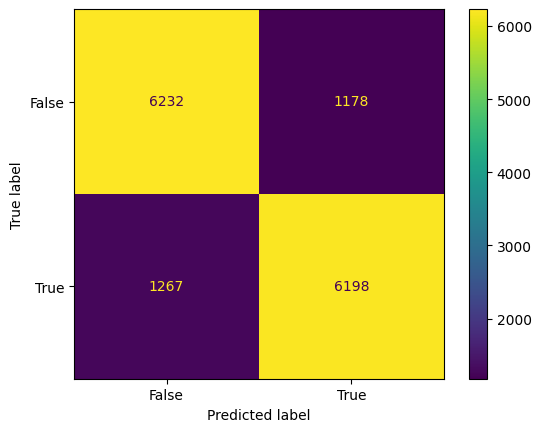

In [ ]:
import matplotlib.pyplot as plt
cm_display.plot()
plt.show()

In [ ]:
#metrics
from sklearn.metrics import classification_report
report = classification_report(test_Y, predict1)
print(report)

              precision    recall  f1-score   support

           0       0.67      0.84      0.74      7410
           1       0.79      0.59      0.67      7465

    accuracy                           0.71     14875
   macro avg       0.73      0.71      0.71     14875
weighted avg       0.73      0.71      0.71     14875

